This code enables to aggregate the 30m pixels in to 5-arcminute reolsutiuon 

In [5]:
import os
import numpy as np
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling
import rasterio.transform

def pixel_area_in_hectares(lat, cell_size_degrees):
    # Constants for the calculations
    a = 6378137  # Semi-major axis of the earth in meters
    b = 6356752.3142  # Semi-minor axis of the earth in meters
    e = np.sqrt(1 - (b/a)**2)  # Eccentricity
    lat_rad = np.radians(lat)  # Convert latitude to radians
    M = (a * (1 - e**2)) / (1 - e**2 * np.sin(lat_rad)**2)**(1.5)  # Meridian radius of curvature
    N = a / np.sqrt(1 - e**2 * np.sin(lat_rad)**2)  # Prime vertical radius of curvature
    lat_degree_length = np.pi / 180 * M  # Length of a degree of latitude in meters
    lon_degree_length = np.pi / 180 * np.cos(lat_rad) * N  # Length of a degree of longitude in meters
    pixel_area_m2 = (lat_degree_length * lon_degree_length) * (cell_size_degrees**2)  # Pixel area in m^2
    return pixel_area_m2 / 10000  # Convert m^2 to hectares

# Paths
input_raster_path ="E:\\Brazil Validation\\Soybeans\\2010.tif"
output_directory = 'E:\\Brazil Validation\\Soybeans\\Resampled\\Brazil_FInal\\2000'

# Ensure the output directory exists
os.makedirs(output_directory, exist_ok=True)

# Processing the raster
with rasterio.open(input_raster_path) as src:
    # Define the new transform and width/height for 5 arc-minute resolution
    transform, width, height = calculate_default_transform(
        src.crs, src.crs, src.width, src.height, *src.bounds,
        resolution=(0.083333, 0.083333)  # 5 arc minutes in degrees
    )

    # Define the metadata for the new aggregated raster
    kwargs = src.meta.copy()
    kwargs.update({
        'transform': transform,
        'width': width,
        'height': height,
        'nodata': src.nodata,
        'dtype': 'float32'  # Adjust dtype to float32 if necessary
    })

    # Initialize an empty array for the aggregated data
    aggregated_data = np.zeros((height, width), dtype='float32')
    
    # Reproject and aggregate the data using 'average' reduction
    reproject(
        source=rasterio.band(src, 1),
        destination=aggregated_data,
        src_transform=src.transform,
        src_crs=src.crs,
        dst_transform=transform,
        dst_crs=src.crs,
        resampling=Resampling.average
    )

    # Adjust the values based on the pixel area in hectares
    for i in range(height):
        for j in range(width):
            # Calculate the latitude for the current pixel
            lat, lon = rasterio.transform.xy(transform, i, j, offset='center')
            
            # Calculate the pixel area in hectares
            pixel_area_ha = pixel_area_in_hectares(lat, 0.083333)  # cell size for 5 arc minutes
            
            # Multiply the pixel value by its area in hectares
            aggregated_data[i, j] *= pixel_area_ha

    # Save the aggregated raster
    output_path = os.path.join(output_directory, '2010.tif')
    with rasterio.open(output_path, 'w', **kwargs) as dst:
        dst.write(aggregated_data, 1)


In [6]:
import os
import numpy as np
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling
import rasterio.transform

def pixel_area_in_hectares(lat, cell_size_degrees):
    # Constants for the calculations
    a = 6378137  # Semi-major axis of the earth in meters
    b = 6356752.3142  # Semi-minor axis of the earth in meters
    e = np.sqrt(1 - (b/a)**2)  # Eccentricity
    lat_rad = np.radians(lat)  # Convert latitude to radians
    M = (a * (1 - e**2)) / (1 - e**2 * np.sin(lat_rad)**2)**(1.5)  # Meridian radius of curvature
    N = a / np.sqrt(1 - e**2 * np.sin(lat_rad)**2)  # Prime vertical radius of curvature
    lat_degree_length = np.pi / 180 * M  # Length of a degree of latitude in meters
    lon_degree_length = np.pi / 180 * np.cos(lat_rad) * N  # Length of a degree of longitude in meters
    pixel_area_m2 = (lat_degree_length * lon_degree_length) * (cell_size_degrees**2)  # Pixel area in m^2
    return pixel_area_m2 / 10000  # Convert m^2 to hectares

# Paths
input_raster_path ="E:\\Brazil Validation\\Soybeans\\2015.tif"
output_directory = 'E:\\Brazil Validation\\Soybeans\\Resampled\\Brazil_FInal\\2005'

# Ensure the output directory exists
os.makedirs(output_directory, exist_ok=True)

# Processing the raster
with rasterio.open(input_raster_path) as src:
    # Define the new transform and width/height for 5 arc-minute resolution
    transform, width, height = calculate_default_transform(
        src.crs, src.crs, src.width, src.height, *src.bounds,
        resolution=(0.083333, 0.083333)  # 5 arc minutes in degrees
    )

    # Define the metadata for the new aggregated raster
    kwargs = src.meta.copy()
    kwargs.update({
        'transform': transform,
        'width': width,
        'height': height,
        'nodata': src.nodata,
        'dtype': 'float32'  # Adjust dtype to float32 if necessary
    })

    # Initialize an empty array for the aggregated data
    aggregated_data = np.zeros((height, width), dtype='float32')
    
    # Reproject and aggregate the data using 'average' reduction
    reproject(
        source=rasterio.band(src, 1),
        destination=aggregated_data,
        src_transform=src.transform,
        src_crs=src.crs,
        dst_transform=transform,
        dst_crs=src.crs,
        resampling=Resampling.average
    )

    # Adjust the values based on the pixel area in hectares
    for i in range(height):
        for j in range(width):
            # Calculate the latitude for the current pixel
            lat, lon = rasterio.transform.xy(transform, i, j, offset='center')
            
            # Calculate the pixel area in hectares
            pixel_area_ha = pixel_area_in_hectares(lat, 0.083333)  # cell size for 5 arc minutes
            
            # Multiply the pixel value by its area in hectares
            aggregated_data[i, j] *= pixel_area_ha

    # Save the aggregated raster
    output_path = os.path.join(output_directory, '2015.tif')
    with rasterio.open(output_path, 'w', **kwargs) as dst:
        dst.write(aggregated_data, 1)


C:\Users\endal\anaconda3\envs\mirca_2015\lib\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.draw()
C:\Users\endal\AppData\Local\Temp\ipykernel_25428\2201349377.py:149: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_bar.set_xticklabels(labels, fontsize=16)
C:\Users\endal\AppData\Local\Temp\ipykernel_25428\2201349377.py:150: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_bar.set_yticklabels([f'{int(tick)}%' for tick in ax_bar.get_yticks()], fontsize=16)
C:\Users\endal\anaconda3\envs\mirca_2015\lib\site-packages\geopandas\plotting.py:482: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.draw()
C:\Users\endal\AppData\Local\Temp\ipykernel_25428\2201349377.py:149: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_bar.set_xticklabels(labels, fontsize=16)
C:\Users\endal\AppData\Local\Temp\ipykernel_25428\220

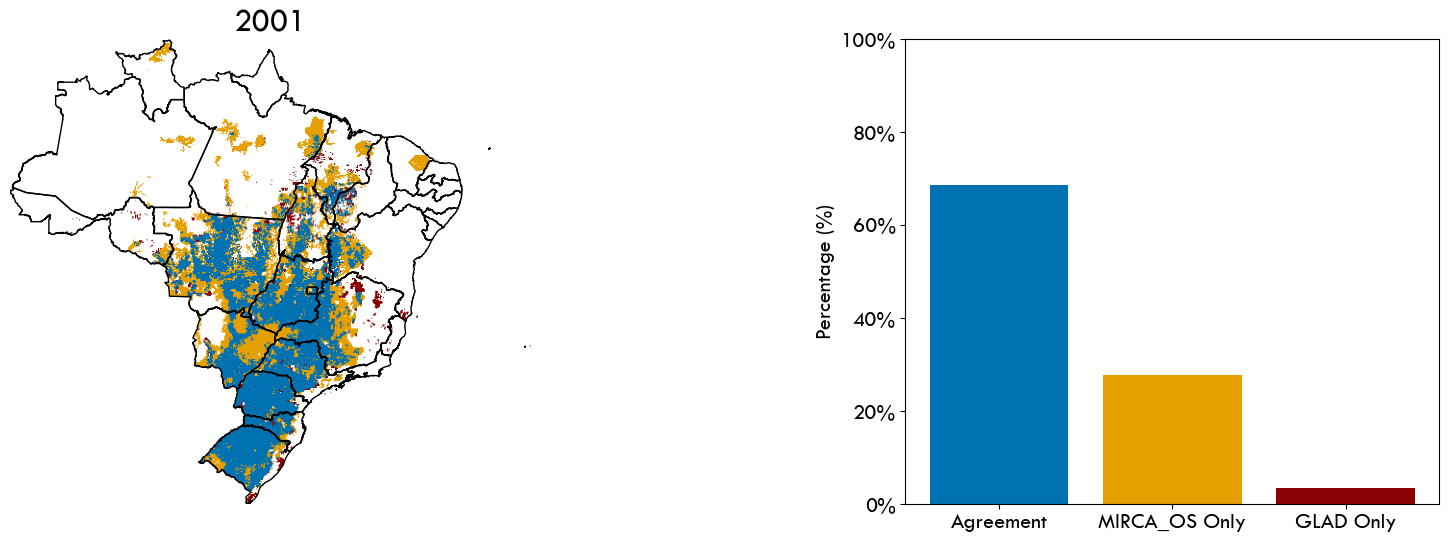

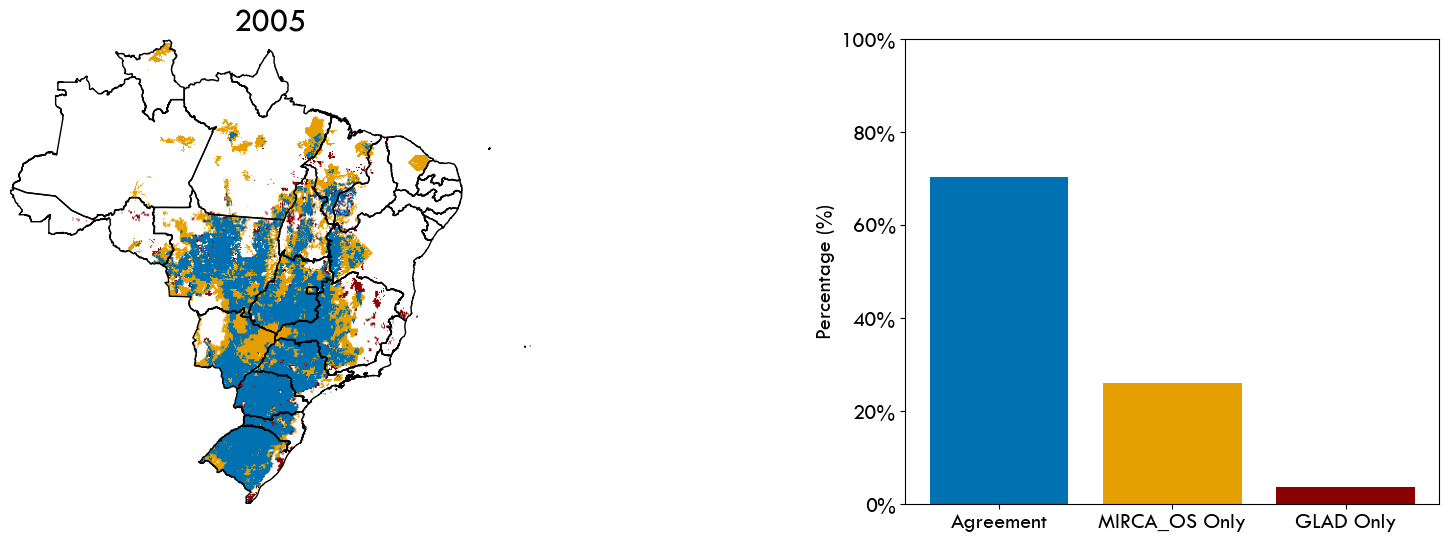

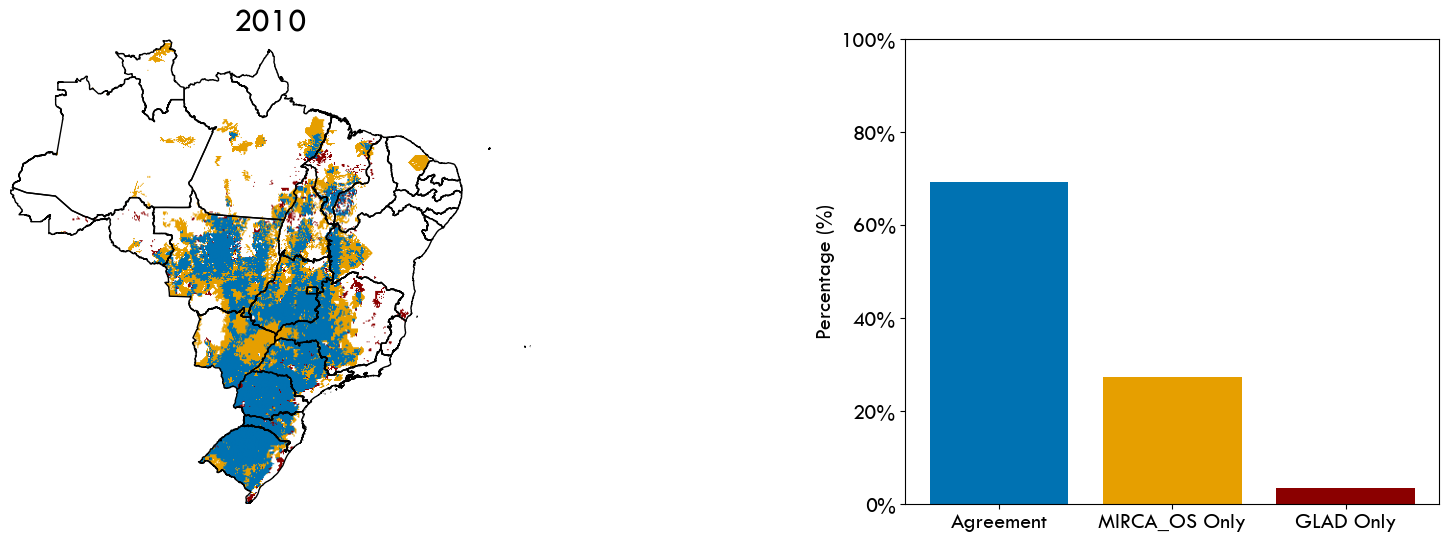

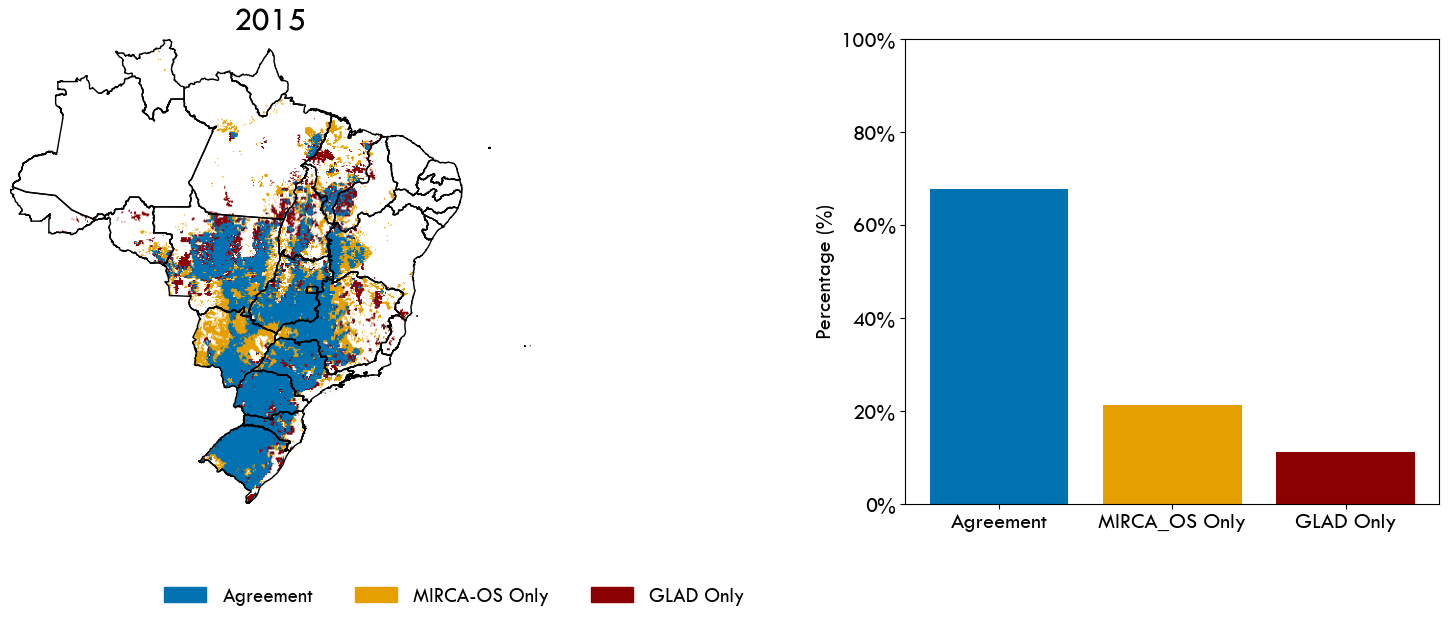

In [16]:
import os
import matplotlib.pyplot as plt
import rasterio
import numpy as np
import geopandas as gpd
import matplotlib.patches as mpatches
from matplotlib import font_manager
from rasterio.warp import reproject, Resampling

# Define colorblind-friendly colors for the plot
dark_blue = '#0072B2'  # Dark Blue for agreement
orange = '#E69F00'  # Orange for MIRCA-OS Only
dark_red = '#8B0000'  # Dark Red for MIRCA2000 Only

# Check if 'Tw Cen MT' font is available
if 'Tw Cen MT' not in [f.name for f in font_manager.fontManager.ttflist]:
    print('The "Tw Cen MT" font is not available on your system. Please use an available font or install "Tw Cen MT".')
    title_font = 'sans-serif'
else:
    title_font = 'Tw Cen MT'

# Function to read raster data
def read_raster(file_path):
    with rasterio.open(file_path) as src:
        return src.read(1), src.transform, src.crs

# Function to reproject and resample raster data to match another raster
def reproject_and_resample(src_data, src_transform, src_crs, dst_shape, dst_transform, dst_crs):
    dst_data = np.zeros(dst_shape, dtype=src_data.dtype)
    reproject(
        source=src_data,
        destination=dst_data,
        src_transform=src_transform,
        src_crs=src_crs,
        dst_transform=dst_transform,
        dst_crs=dst_crs,
        resampling=Resampling.nearest
    )
    return dst_data, dst_transform

# Function to get the extent of a raster from its transform
def get_extent(transform, width, height):
    left = transform[2]
    top = transform[5]
    right = left + transform[0] * width
    bottom = top + transform[4] * height
    return (left, right, bottom, top)

# Function to clean raster data
def clean_raster_data(raster_data, extreme_value_threshold=0):
    cleaned_data = np.where(raster_data < extreme_value_threshold, np.nan, raster_data)
    return cleaned_data

# Function to calculate agreement percentages for the bar chart
def calculate_percentages(agree, mirca_os_only, mirca_2000_only):
    agree_count = np.sum(agree)
    mirca_os_only_count = np.sum(mirca_os_only)
    mirca_2000_only_count = np.sum(mirca_2000_only)
    total_valid_pixels = agree_count + mirca_os_only_count + mirca_2000_only_count
    agree_pct = (agree_count / total_valid_pixels) * 100 if total_valid_pixels > 0 else 0
    mirca_os_only_pct = (mirca_os_only_count / total_valid_pixels) * 100 if total_valid_pixels > 0 else 0
    mirca_2000_only_pct = (mirca_2000_only_count / total_valid_pixels) * 100 if total_valid_pixels > 0 else 0
    return agree_pct, mirca_os_only_pct, mirca_2000_only_pct

# Function to calculate IoU
def calculate_iou(agree, mirca_os_only, mirca_2000_only):
    intersection = np.sum(agree)
    union = intersection + np.sum(mirca_os_only) + np.sum(mirca_2000_only)
    iou = intersection / union if union > 0 else 0
    return iou

# Load the shapefile and reproject it to WGS84
shapefile_path = "D:\\PhD_Udel\\MICRA_2015\\DOwnscaling\\NASAOCE\\Shapefile\\gadm41_BRA_1.shp"
world = gpd.read_file(shapefile_path)
world = world.to_crs(epsg=4326)

# Directories for raster data
base_dir_os = "E:\\Brazil Validation\\Total Soy\\MIRCA-OS"
base_dir_2000 = 'E:\\Brazil Validation\\Soybeans\\Resampled\\Brazil_FInal\\2000\\Final'

# Crop names
crops = ["2001", "2005", "2010", "2015"]

# Set up the plot dimensions and resolution
figsize = (20, 6)  # Adjusted to include space for the bar chart
dpi = 100  # Adjust the dpi to your preference for resolution

# Create a plot for each crop
for i, crop in enumerate(crops):
    fig, (ax_map, ax_bar) = plt.subplots(1, 2, figsize=figsize, dpi=dpi, gridspec_kw={'width_ratios': [3, 1]})
    
    # Read rasters
    raster1, transform1, crs1 = read_raster(f'{base_dir_os}/{crop}.tif')
    raster2, transform2, crs2 = read_raster(f'{base_dir_2000}/{crop}.tif')

    # Reproject rasters to WGS84
    if crs1 != 'EPSG:4326':
        raster1, transform1 = reproject_and_resample(raster1, transform1, crs1, raster1.shape, transform1, 'EPSG:4326')
    if crs2 != 'EPSG:4326':
        raster2, transform2 = reproject_and_resample(raster2, transform2, crs2, raster1.shape, transform1, 'EPSG:4326')

    # Ensure raster2 has the same dimensions as raster1
    raster2_resampled, _ = reproject_and_resample(
        raster2, transform2, crs2, raster1.shape, transform1, 'EPSG:4326'
    )

    # Clean rasters
    raster1 = clean_raster_data(raster1)
    raster2_resampled = clean_raster_data(raster2_resampled)
    raster1 = np.maximum(raster1, 0)
    raster2_resampled = np.maximum(raster2_resampled, 0)
    
    # Compare rasters
    agree = (raster1 >= 0) & (raster2_resampled >= 0)
    mirca_os_only = (raster1 > 0) & ((raster2_resampled == 0) | np.isnan(raster2_resampled))
    mirca_2000_only = (raster2_resampled > 0) & ((raster1 == 0) | np.isnan(raster1))

    # Initialize combined RGB array with white background
    combined_rgb = np.ones((raster1.shape[0], raster1.shape[1], 3))

    # Apply new colors based on the comparison
    combined_rgb[agree] = np.array([0, 114, 178]) / 255  # Dark Blue for agreement
    combined_rgb[mirca_os_only] = np.array([230, 159, 0]) / 255  # Orange for MIRCA-OS Only
    combined_rgb[mirca_2000_only] = np.array([139, 0, 0]) / 255  # Dark Red for MIRCA2000 Only

    # Plot map
    extent = get_extent(transform1, raster1.shape[1], raster1.shape[0])
    ax_map.imshow(combined_rgb, extent=extent)
    ax_map.set_title(f'{crop}', fontsize=24, fontname=title_font)
    ax_map.set_frame_on(False)
    world.boundary.plot(ax=ax_map, linewidth=1, edgecolor='black')

    # Remove x and y ticks
    ax_map.set_xticks([])
    ax_map.set_yticks([])

    # Calculate percentages for the bar chart
    agree_pct, mirca_os_only_pct, mirca_2000_only_pct = calculate_percentages(agree, mirca_os_only, mirca_2000_only)

    # Calculate IoU score
    iou = calculate_iou(agree, mirca_os_only, mirca_2000_only)

    # Plot bar chart on ax_bar
    labels = ['Agreement', 'MIRCA_OS Only', 'GLAD Only']
    percentages = [agree_pct, mirca_os_only_pct, mirca_2000_only_pct]
    ax_bar.bar(labels, percentages, color=[dark_blue, orange, dark_red])
    ax_bar.set_ylabel('Percentage (%)', fontsize=16)
    ax_bar.set_ylim(0, 100)
    ax_bar.set_xticklabels(labels, fontsize=16)
    ax_bar.set_yticklabels([f'{int(tick)}%' for tick in ax_bar.get_yticks()], fontsize=16)

    # Display IoU score on the bar chart
#     ax_bar.text(1.5, 105, f'IoU: {iou:.2f}', ha='center', va='center', fontsize=20, fontname=title_font, bbox=dict(facecolor='white', edgecolor='none', pad=2.0))

    # Legend
    if i == len(crops) - 1:
        legend_elements = [
            mpatches.Patch(color=dark_blue, label='Agreement'),
            mpatches.Patch(color=orange, label='MIRCA-OS Only'),
            mpatches.Patch(color=dark_red, label='GLAD Only')
        ]
        # Place the legend below the last map, centered
        plt.figlegend(handles=legend_elements, loc='lower center', ncol=3, fontsize=15, frameon=False, bbox_to_anchor=(0.5, -0.1))
#     if i == len(crops) - 1:
#         legend_elements = [
#             mpatches.Patch(color=dark_blue, label='Agreement'),
#             mpatches.Patch(color=orange, label='MIRCA-OS Only'),
#             mpatches.Patch(color=dark_red, label='GLAD Only')
#         ]
#         plt.figlegend(handles=legend_elements, loc='lower center', ncol=3, fontsize=16, frameon=False, bbox_to_anchor=(0.5, -0.05))

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the rect parameter to fit your plot and legend inside the figure
    plt.savefig(f'E:\\Brazil Validation\\Final Maps\\{crop}_2015.png', bbox_inches='tight')

plt.show()
